In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gold_pr = pd.read_csv("gold_price_data.csv")
gold_pr.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
gold_pr.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [4]:
gold_pr.shape

(2290, 6)

In [5]:
gold_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_pr.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
gold_pr.drop("Date", axis = 1, inplace = True)

In [8]:
gold_pr.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


<AxesSubplot:xlabel='SPX', ylabel='GLD'>

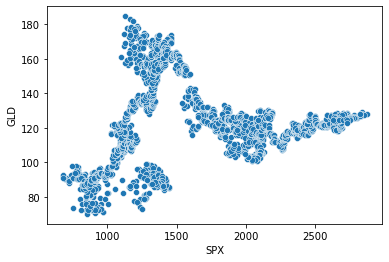

In [12]:
sns.scatterplot(data = gold_pr, x = "SPX", y = "GLD")

<AxesSubplot:xlabel='USO', ylabel='GLD'>

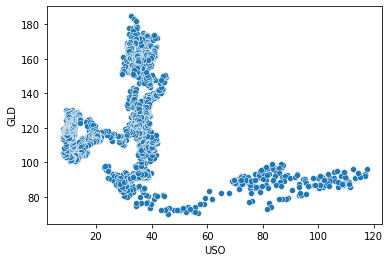

In [13]:
sns.scatterplot(data = gold_pr, x = "USO", y = "GLD")

<AxesSubplot:xlabel='SLV', ylabel='GLD'>

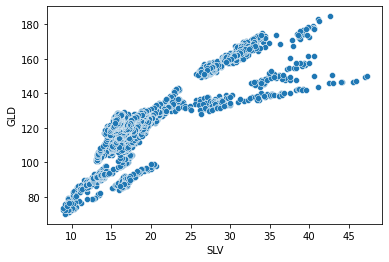

In [14]:
sns.scatterplot(data = gold_pr, x = "SLV", y = "GLD")

<AxesSubplot:xlabel='EUR/USD', ylabel='GLD'>

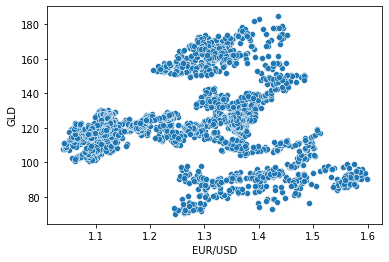

In [15]:
sns.scatterplot(data = gold_pr, x = "EUR/USD", y = "GLD")

<AxesSubplot:>

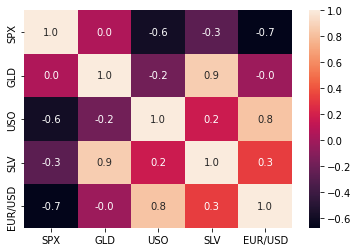

In [16]:
sns.heatmap(gold_pr.corr(), annot = True, fmt = "0.1f")

<AxesSubplot:xlabel='GLD', ylabel='count'>

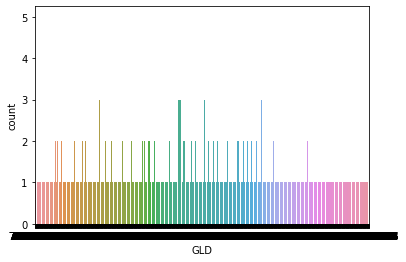

In [17]:
sns.countplot(x = gold_pr["GLD"])

In [18]:
X=gold_pr.drop("GLD", axis=1)
Y=gold_pr["GLD"]


In [19]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [20]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

xtrain,xtest, ytrain,ytest = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
xtrain.head()

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998


In [26]:
xtest.head()

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247


In [27]:
ytrain.head()

476     109.879997
1958    115.540001
248      90.930000
2231    125.370003
1325    119.889999
Name: GLD, dtype: float64

In [28]:
ytest.head()

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
Name: GLD, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [30]:
yp = lr.predict(xtest)

In [31]:
yp

array([159.45290968,  81.50858067, 113.4868037 , 128.55153817,
       126.20403783, 141.31818338, 165.49416492, 124.44197659,
       113.95389904, 122.9965895 , 113.95492464, 174.89529849,
       132.66890174, 159.24793304, 118.8791679 , 122.14315717,
       150.37153054, 161.27175405, 152.2792036 , 162.19946709,
       145.88372183, 118.07669395, 180.21729122, 178.13331554,
       123.51701986,  98.82914322,  76.63486248, 119.38435511,
       113.85027665, 159.25706609,  93.76037617, 120.05334649,
        88.61086583, 114.28801659, 112.77954274, 144.19518102,
       118.78252489, 115.87334354, 144.06409553, 113.81864246,
       100.49676727,  89.42842238, 120.36720699, 110.47635305,
       146.4894628 , 119.30321261, 110.99311348, 111.3386287 ,
        96.48139076, 123.40842816,  79.51413425, 115.36111603,
       121.78896764, 114.55367722, 120.9074622 , 117.10612464,
       152.31198525, 182.7735091 , 196.73570503,  91.06670951,
       101.92097594,  87.48443506,  94.33158785, 119.17

In [32]:
xtest

,SPX,USO,SLV,EUR/USD
903,1351.949951,38.330002,32.900002,1.324854
129,1271.510010,93.900002,13.450000,1.472581
1787,1880.050049,8.910000,14.340000,1.119996
1913,2181.300049,10.960000,18.620001,1.127142
2048,2352.949951,10.680000,17.320000,1.067247
...,...,...,...,...
923,1370.869995,41.090000,33.220001,1.327492
1693,1952.290039,14.930000,13.990000,1.129089
2054,2349.010010,11.060000,17.430000,1.064453
658,1273.849976,37.680000,28.420000,1.315686


In [33]:
ytest

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64

In [34]:
lr.score(xtest, ytest)*100

86.57886565869237

In [35]:
lr.coef_

array([ 6.82770004e-03, -2.56764053e-01,  3.17723486e+00, -8.99975261e+00])

In [41]:
lr.intercept_

67.45629268976195